# Action potential speed

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 4]    # Do not put in same cell as import statement

In [3]:
from neuron import h, gui, load_mechanisms   
from nrnutils import Section, Mechanism      
import Model

In [4]:
# It is not possible to consistently get the path of a Jupyter notebook. But this may work most of the time.
# If not, paste the absolute path to the folder containing the mod files (not the compiled files)
import os
current_path = os.getcwd()
load_mechanisms(os.path.join(current_path, "mod"))

True

In [5]:
model = Model.without_ih()

In [6]:
# Some special place
first_Bouton = model.boutons[0]
second_Bouton = model.boutons[1]
last_Bouton = model.boutons[-1]
# Checking topology
s = h.Shape()
s.show(False)
s.color(2, sec=first_Bouton)      # color first bouton red
s.color(3, sec=second_Bouton)     # color second bouton blue
s.color(4, sec=last_Bouton)       # color last bouton green

0.0

In [7]:
pre_interval = 1000.
sim_interval = 50.

In [8]:
stim = h.Ipulse1(first_Bouton(0.5))
stim.delay  = pre_interval + 5.
stim.ton  = 0.1
stim.toff = 1.9
stim.num  = 10
stim.amp  = 2

In [9]:
# Record time and voltage at first, second and last bouton
t = h.Vector()          # Time stamp vector [ms]
v1 = h.Vector()          # Membrane potential vector [mV]
v2 = h.Vector()          # Membrane potential vector [mV]
v3 = h.Vector()          # Membrane potential vector [mV]

t.record(h._ref_t) 
v1.record(first_Bouton(0.5)._ref_v)
v2.record(second_Bouton(0.5)._ref_v)
v3.record(last_Bouton(0.5)._ref_v)

Vector[6]

In [10]:
h.tstop = pre_interval + sim_interval
h.run()
t.add(-pre_interval) # Discard the first 1000ms to equilibrate the membrane potential

Vector[3]

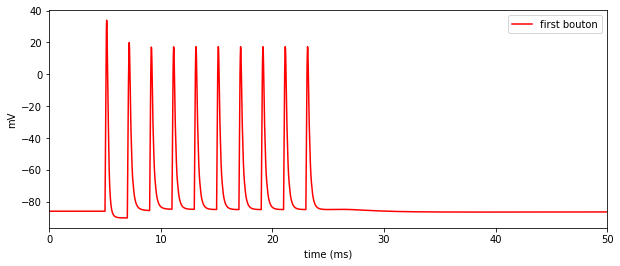

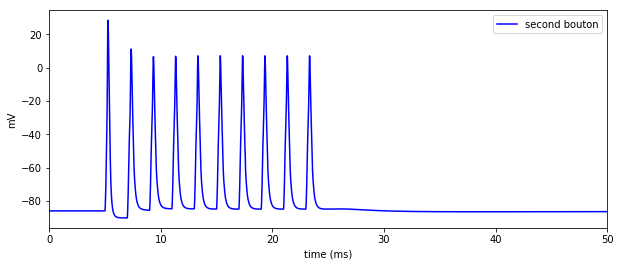

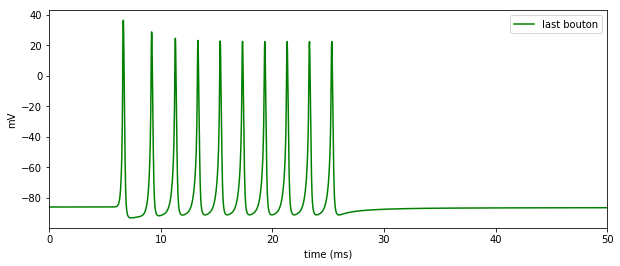

In [11]:
fig = plt.figure() 
plt.xlabel('time (ms)')
plt.ylabel('mV')
plt.plot(t, v1, color='red', label='first bouton')
plt.xlim((0,sim_interval))   
plt.legend()

fig = plt.figure() 
plt.xlabel('time (ms)')
plt.ylabel('mV')
plt.plot(t, v2, color='blue', label='second bouton')
plt.xlim((0,sim_interval))   
plt.legend()

fig = plt.figure() 
plt.xlabel('time (ms)')
plt.ylabel('mV')
plt.plot(t, v3, color='green', label='last bouton')
plt.xlim((0,sim_interval))   
plt.legend()


plt.show()
